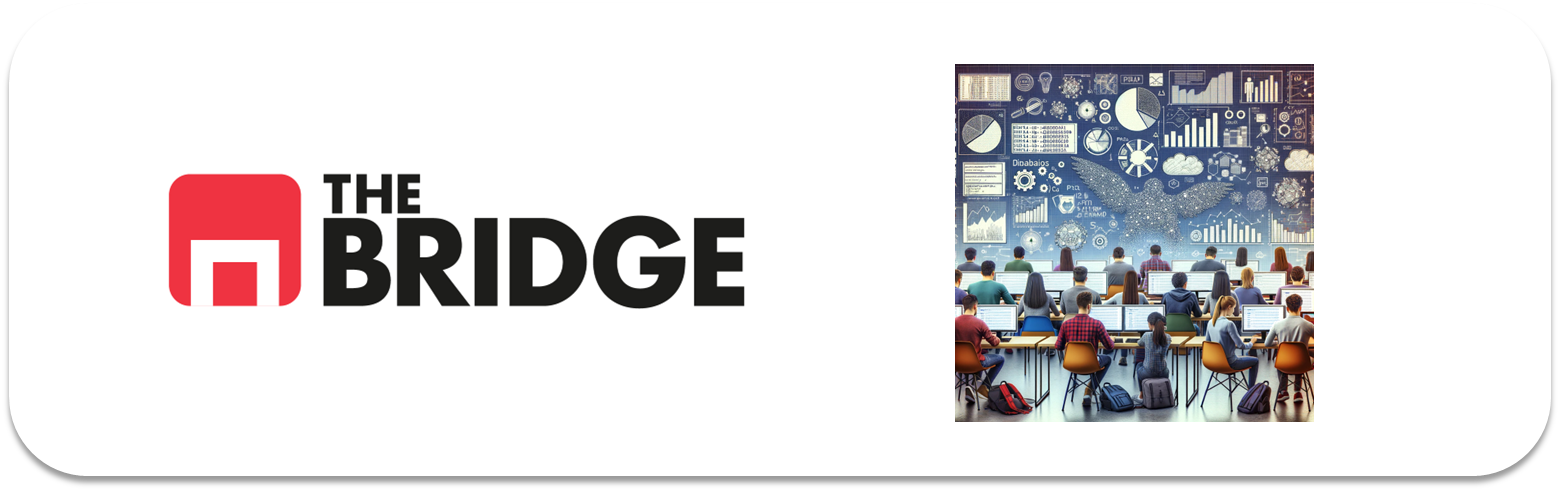

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pprint import pprint
from sklearn.metrics import roc_curve, auc

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [38]:
df_titanic = pd.read_csv('./data/titanic.csv')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [40]:
df_titanic.drop(["deck", "alive", "class", "embark_town"], axis=1, inplace=True)

In [41]:
df_titanic.loc[df_titanic['embarked'].isna(), "embarked"] = df_titanic['embarked'].mode()[0]

In [42]:
df_titanic['age_who']=df_titanic.groupby('who')['age'].transform("mean")
df_titanic.loc[df_titanic['age'].isna(),"age"]=df_titanic.loc[df_titanic['age'].isna(),"age_who"]

In [43]:
df_titanic.drop(["age_who"], axis=1, inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   who         891 non-null    object 
 9   adult_male  891 non-null    bool   
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


In [44]:
def describe_df (data: pd.DataFrame) -> pd.DataFrame: # Esto es para decir que tipo de data te devuelve
    '''
    Argumentos:
    data(pd.DataFrame): DataFrame de Pandas inicial

    Retorna:
    pd.DataFrame: Data inicial transformado   
    '''
    dic_describe = {
        'DATA_TYPE' : [data[x].dtype for x in data],
        'MISSINGS (%)' : [round(data[x].isnull().sum()/len(data[x])*100,2) for x in data],
        'UNIQUE_VALUES' : [data[x].nunique() for x in data],
        'CARDIN (%)' : [round(data[x].nunique() / len(data[x]) * 100, 2) for x in data]
    }
    
    return pd.DataFrame(dic_describe, index=[x for x in data]).T

In [45]:
describe_df(df_titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
DATA_TYPE,int64,int64,object,float64,int64,int64,float64,object,object,bool,bool
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,2,3,2,89,7,7,248,3,3,2,2
CARDIN (%),0.22,0.34,0.22,9.99,0.79,0.79,27.83,0.34,0.34,0.22,0.22


In [46]:
def _classify(data: pd.DataFrame, key: str,  umbral_categoria:int, umbral_continua:float) -> str:
    # Podemos añadir un if para tener en cuenta los nulos aquí
    cardi = data[key].nunique()
    if cardi == 2:
        return "Binaria"
    elif cardi < umbral_categoria:
        return "Categórica"
    elif cardi/len(data[key])*100 >= umbral_continua:
        return "Numérica Continua"
    else:
        return "Numérica Discreta"
        

def tipifica_variable (data:pd.DataFrame, umbral_categoria:int, umbral_continua:float) -> pd.DataFrame:
    '''
    Argumentos:
    data(pd.DataFrame): DataFrame de Pandas inicial
    umbral_categoria(int): Número que escogemos para delimitar a partir de cuanto consideramos que es una variable categorica
    umbral_continua(float): Número que escogemos para delimitar a partir de cuanto una variable numérica es discreta
    
    Retorna:
    pd.DataFrame: Data inicial transformado   
    '''

    dic_tip_var = {
        "tipo_sugerido": [_classify(data, key, umbral_categoria, umbral_continua) for key in data]
    }

    return pd.DataFrame(dic_tip_var, index=[x for x in data])

In [47]:
tipifica_variable(df_titanic,10,30)

,tipo_sugerido
survived,Binaria
pclass,Categórica
sex,Binaria
age,Numérica Discreta
sibsp,Categórica
parch,Categórica
fare,Numérica Discreta
embarked,Categórica
who,Categórica
adult_male,Binaria


In [48]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.000000,1,0,7.2500,S,man,True,False
1,1,1,female,38.000000,1,0,71.2833,C,woman,False,False
2,1,3,female,26.000000,0,0,7.9250,S,woman,False,True
3,1,1,female,35.000000,1,0,53.1000,S,woman,False,False
4,0,3,male,35.000000,0,0,8.0500,S,man,True,True
5,0,3,male,33.173123,0,0,8.4583,Q,man,True,True
6,0,1,male,54.000000,0,0,51.8625,S,man,True,True
7,0,3,male,2.000000,3,1,21.0750,S,child,False,False
8,1,3,female,27.000000,0,2,11.1333,S,woman,False,False
9,1,2,female,14.000000,1,0,30.0708,C,child,False,False


In [49]:
categories = [["man","woman","child"], ["S","C","Q"], ["male", "female"]]
ordinal_encoder = OrdinalEncoder(categories= categories)
df_titanic[["who", "embarked", "sex"]] = ordinal_encoder.fit_transform(df_titanic[["who", "embarked", "sex"]])

In [50]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0.0,22.0,1,0,7.2500,0.0,0.0,True,False
1,1,1,1.0,38.0,1,0,71.2833,1.0,1.0,False,False
2,1,3,1.0,26.0,0,0,7.9250,0.0,1.0,False,True
3,1,1,1.0,35.0,1,0,53.1000,0.0,1.0,False,False
4,0,3,0.0,35.0,0,0,8.0500,0.0,0.0,True,True


In [51]:
df_titanic['adult_male'] = df_titanic['adult_male'].replace({True: 1, False: 0})
df_titanic['alone'] = df_titanic['alone'].replace({True: 1, False: 0})

C:\Users\annav\AppData\Local\Temp\ipykernel_9884\442847564.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_titanic['adult_male'] = df_titanic['adult_male'].replace({True: 1, False: 0})
C:\Users\annav\AppData\Local\Temp\ipykernel_9884\442847564.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_titanic['alone'] = df_titanic['alone'].replace({True: 1, False: 0})


In [52]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0.0,22.0,1,0,7.2500,0.0,0.0,1,0
1,1,1,1.0,38.0,1,0,71.2833,1.0,1.0,0,0
2,1,3,1.0,26.0,0,0,7.9250,0.0,1.0,0,1
3,1,1,1.0,35.0,1,0,53.1000,0.0,1.0,0,0
4,0,3,0.0,35.0,0,0,8.0500,0.0,0.0,1,1


In [53]:
# Target --> Survived

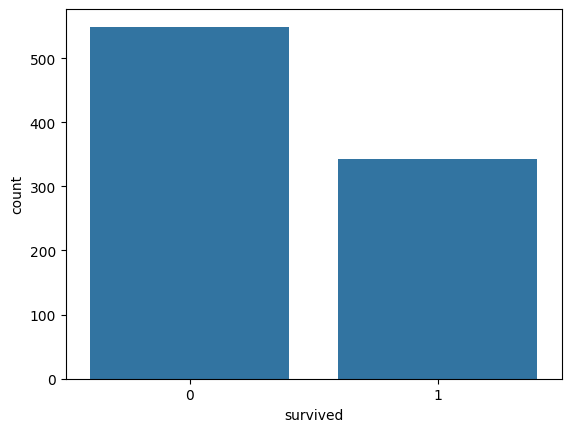

In [54]:
sns.countplot(data=df_titanic, x='survived');

In [55]:
X = df_titanic.drop(['survived'], axis=1)
y = df_titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

In [56]:
df_eda = X_train.copy()
df_eda["survived"] = y_train.copy()

In [57]:
corr = np.abs(df_eda.corr()['survived']).sort_values(ascending=False)

bad_corr_feat = corr[corr < 0.05].index.values

df_eda.drop(columns=bad_corr_feat, inplace=True)

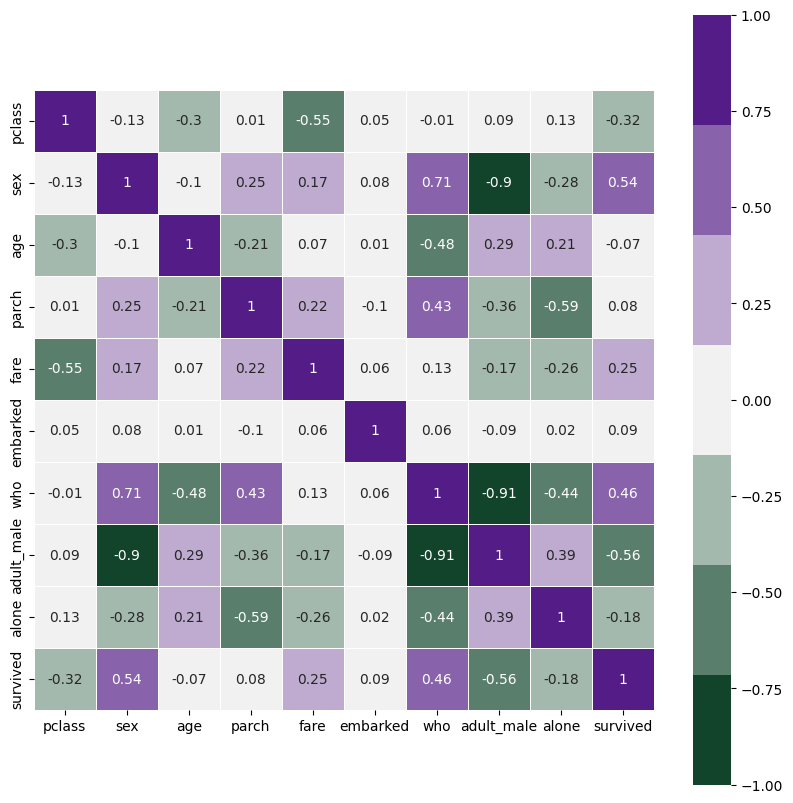

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df_eda.corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

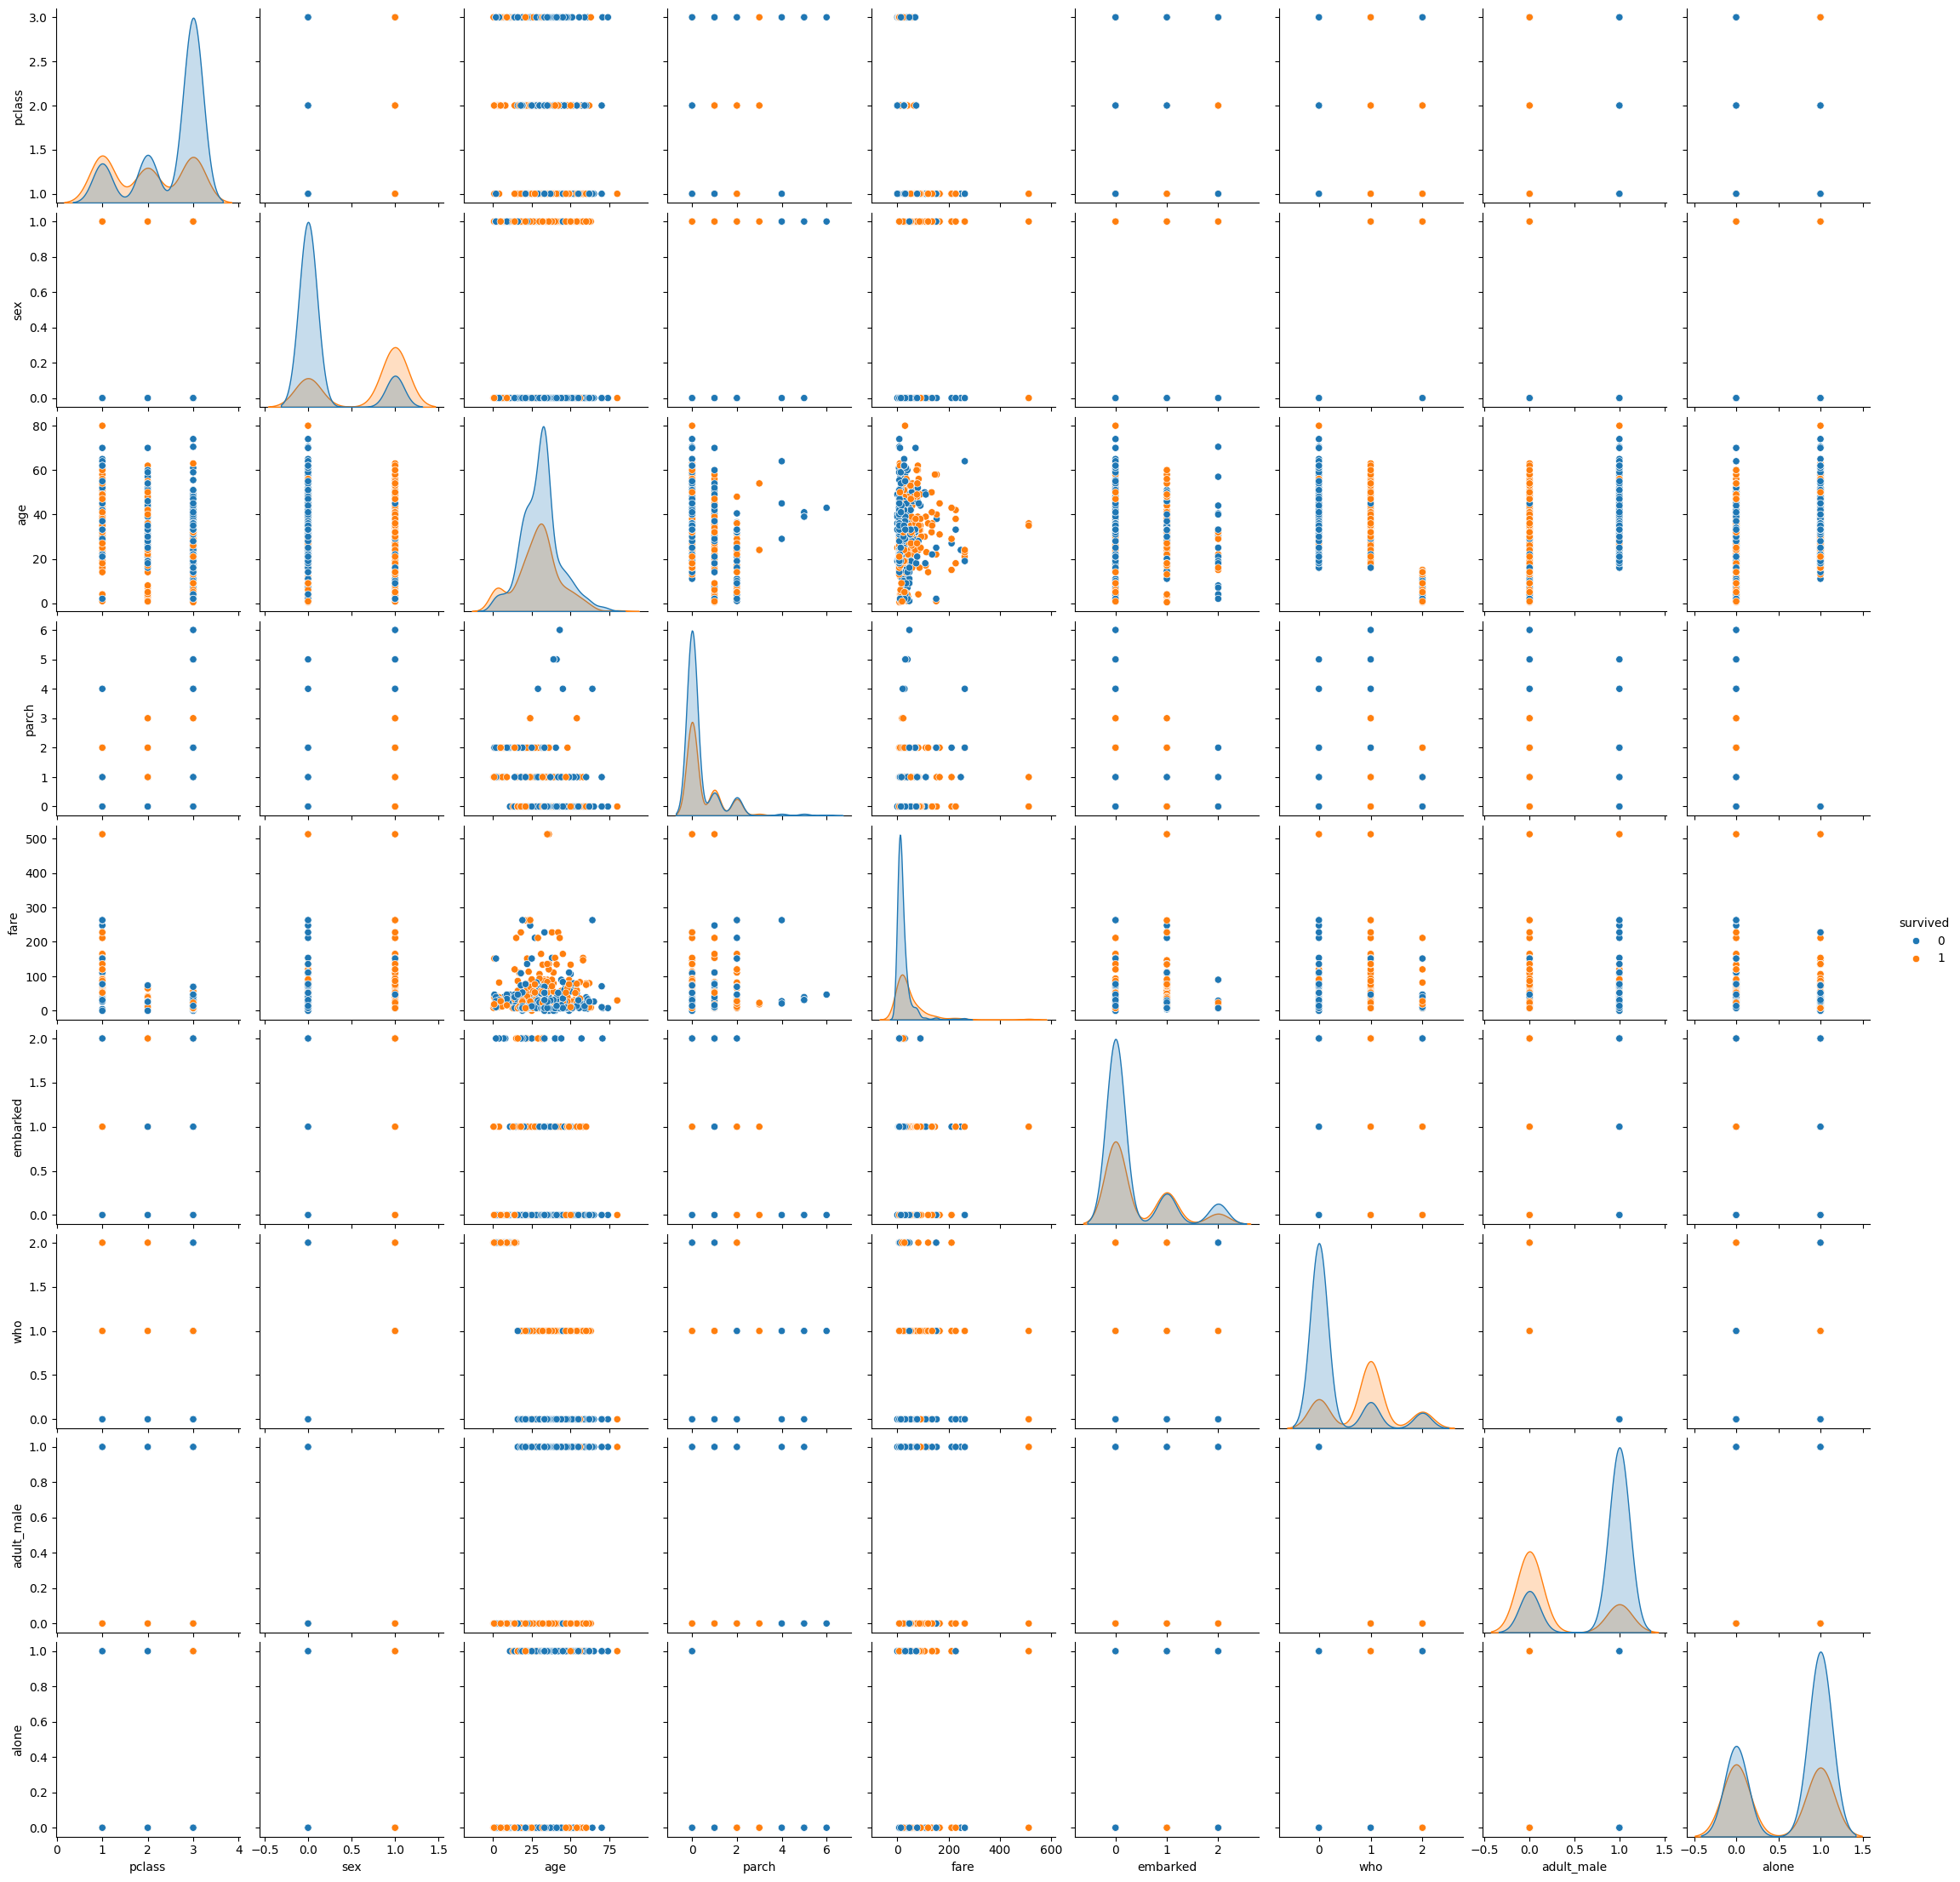

In [59]:
sns.pairplot(df_eda[[col for col in df_eda.columns]], hue = "survived")

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>],
       [<Axes: title={'center': 'embarked'}>,
        <Axes: title={'center': 'who'}>,
        <Axes: title={'center': 'adult_male'}>],
       [<Axes: title={'center': 'alone'}>, <Axes: >, <Axes: >]],
      dtype=object)

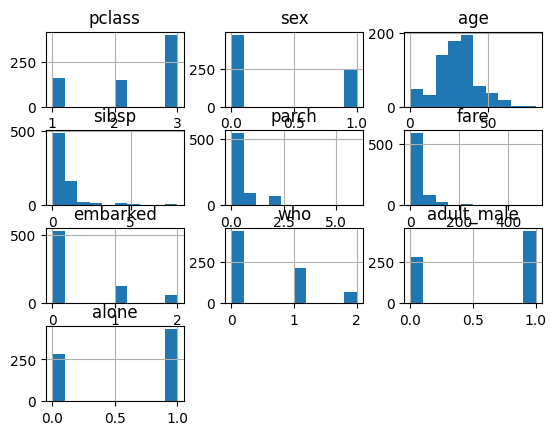

In [60]:
X_train.hist()

### MODELO:

In [64]:
log_reg = LogisticRegression(max_iter = 2000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [65]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[-0.86698092  0.58532403 -0.00792886 -0.60570953 -0.38514067  0.00379945
   0.17233785  0.558002   -1.8505103  -0.52867659]]
[2.81068808]
[0 1]


In [66]:
intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False).head()

,coefficient
adult_male,1.850510
pclass,0.866981
sibsp,0.605710
sex,0.585324
who,0.558002


In [68]:
X_test = X_test[X_train.columns].copy()

In [69]:
acc_train = round(accuracy_score(log_reg.predict(X_train), y_train), 3)
acc_test = round(accuracy_score(log_reg.predict(X_test), y_test), 3)

print("Accuracy train:", acc_train)
print("Accuracy test:", acc_test)

Accuracy train: 0.83
Accuracy test: 0.81


In [70]:
y_train.value_counts(True)

survived
0    0.623596
1    0.376404
Name: proportion, dtype: float64

In [71]:
y_test.value_counts(True)

survived
0    0.586592
1    0.413408
Name: proportion, dtype: float64

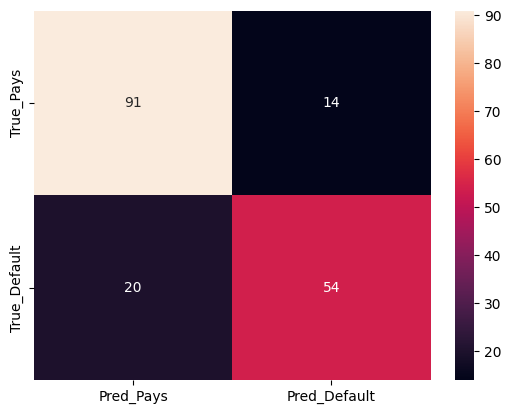

In [73]:
c_matrix = confusion_matrix(y_test, log_reg.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_Pays', 'Pred_Default'],
                          index = ['True_Pays', 'True_Default'])

sns.heatmap(c_matrix_df, annot=True, fmt='g');

c:\Users\annav\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


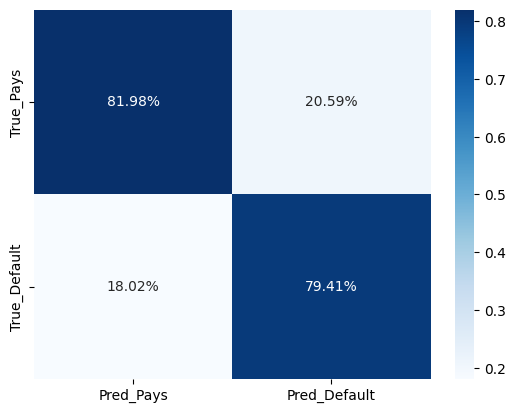

In [74]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df), annot=True, 
            fmt='.2%', cmap='Blues');

In [76]:
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



AUROC: 0.88


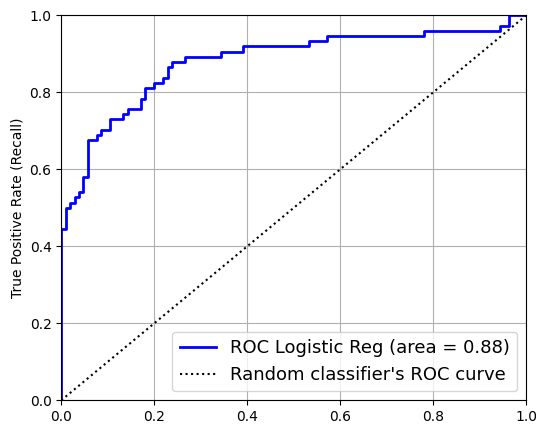

In [78]:

scores = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)